SVM

問題１〜問題３までは個別に関数を作成し

問題４の前で雛形をもとにクラスのスクラッチを完成させる

【問題1】ラグランジュの未定乗数法による最急降下

In [22]:
def SVM_samplefit(X,y,X_val,y_val,gakusyu,itere,rank):
    """
    SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )
        訓練データの正解値
    X_val : 次の形のndarray, shape (n_samples, n_features)
        検証データの特徴量
    y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
    gakusyu: 学習率
    itere:イテレーション数
    rank:rankより高いラグランジュ乗数 λのものを返す
    return
    ----------
    a7: 最後の更新のラグランジュ乗数
    list_param:更新毎のラグランジュ乗数リスト
    a7_val:最後の検証データの更新のラグランジュ乗数
    list_param_val:更新毎の検証データのラグランジュ乗数リスト
    """

    ragu=np.zeros(len(X))
    ragu=ragu.reshape(len(ragu),1)
    ragu=ragu.T
    # yj の項を作る
    y=y.reshape(len(y),1)

    # yi の項を作る(y1とする)
    y1=y
    y2=y
    for i in range(len(y)-1):
        y3=np.hstack([y1,y2])
        y1=y3

    # xj の項を作る（list_x3とする）
    list_x1=[]
    list_x1=np.array(list_x1)

    for i in range(len(X)):
        list_x2=np.hstack([list_x1,X[i]])
        list_x1=list_x2

    list_x3=list_x1.reshape(1,len(list_x1))

    # xj の項を作る（X2とする）
    X1=X.T
    X2=X1
    X3=X1

    for i in range(len(y)-1):
        X4=np.vstack([X2,X3])
        X2=X4

    #　行列の準備ができたので、更新式を計算する
    list_param=[]
    for i in range(itere):
        a1=y1@y
        a2=list_x3@X2
        a3=a1@a2
        a4=ragu@a3
        a5=1-a4
        a6=a5*gakusyu
        a7=ragu+a6
        list_param.append(a7)
        ragu=a7
    
    
    # 検証用データの計算も行う
    ragu_val=np.zeros(len(X_val))
    ragu_val=ragu_val.reshape(len(ragu_val),1)
    ragu_val=ragu_val.T
    # yj の項を作る
    y_val=y_val.reshape(len(y_val),1)

    # yi の項を作る(y1とする)
    y1_val=y_val
    y2_val=y_val
    for i in range(len(y_val)-1):
        y3_val=np.hstack([y1_val,y2_val])
        y1_val=y3_val

    # xj の項を作る（list_x3とする）
    list_x1_val=[]
    list_x1_val=np.array(list_x1_val)

    for i in range(len(X_val)):
        list_x2_val=np.hstack([list_x1_val,X_val[i]])
        list_x1_val=list_x2_val

    list_x3_val=list_x1_val.reshape(1,len(list_x1_val))

    # xj の項を作る（X2とする）
    X1_val=X_val.T
    X2_val=X1_val
    X3_val=X1_val

    for i in range(len(y_val)-1):
        X4_val=np.vstack([X2_val,X3_val])
        X2_val=X4_val

    #　行列の準備ができたので、更新式を計算する
    list_param_val=[]
    for i in range(itere):
        a1_val=y1_val@y_val
        a2_val=list_x3_val@X2_val
        a3_val=a1_val@a2_val
        a4_val=ragu_val@a3_val
        a5_val=1-a4_val
        a6_val=a5_val*gakusyu
        a7_val=ragu_val+a6_val
        list_param_val.append(a7_val)
        ragu_val=a7_val
       
    # 問題２のためのサポートベクターを決定し、インスタンス変数として保持しておくコードを書く
    a8=a7.T
    a9=np.concatenate([a8,X,y],axis=1)
    a10=a9[np.argsort(a9[:,0])][::-1]
    self.sikii_sample=a10[0:rank,:]
    
    return a7,a7_val,list_param,list_param_val

【問題2】サポートベクターの決定

インスタンス変数として「self.sikii_sample」で保存しておく
これを、上のSVM_samplefitの中でインスタンス変数で記録しておく
スクラッチ実装の際に活用
self.sikii_sampleではrankより高いラグランジュ乗数 λもサンプルを返す

【問題3】推定

In [1]:
# 1か-1を返す

def SVM_samplepredict(X,y,target,ramuda,rank):
    """
    SVM分類器を使いラベルを推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    y:次の形のndarray, shape (n_samples,1)
    
    ramuda: 特定のイテレーション数で更新し学習されたラグランジュ乗数リスト
        (1,n_samples)
    target:推定対象の特徴量（推定対象の数, 特徴量の数）
    
    rank:　サポートベクトルとして採用する数

    
    Returns
    -------
    y_pred
        次の形のndarray, shape (n_samples, 1)
        SVM分類器による推定結果
    """
    # ラグランジュ乗数行列を変形し扱いやすくする
    a=ramuda
    
    a8=a.T
    a9=np.concatenate([a8,y,X],axis=1)
    a10=a9[np.argsort(a9[:,0])][::-1]
    # 上位rankリスト完成
    a11=a10[0:rank,:]
    
    
    # 推定のための第１項　ラムダ作成
    
    a11_1=a11[:,0].reshape(1,len(a11))
    
    # 推定のための第２項　サポートベクターのラベル
    a12=a10[0:rank,1]
    a12_1=a12.reshape(rank,1)
    
    #　推定のための第３項任意の知りたいxのと特徴量ベクトル　(target1)
    target1=target
    target2=target
    for i in range(len(a12_1)-1):
        target3=np.concatenate([target1,target2],axis=1)
        target1=target3
    
    
    s_1=a11[:,2:]
    aa=s_1.shape[0]
    bb=s_1.shape[1]
    s_1=a11[:,2:]
    s_2=s_1.reshape(target1.shape[1],1)
    
                    
    #　計算
                    
    d_1= a11_1 @ a12_1
    d_2= target1 @ s_2
    d3 = d_1 * d_2
    
    
    y_pred=[]
    for i in range(len(d3)):
        if d3[i] >= 0:
            y_pred.append(1)
        else:
            y_pred.append(-1)
    
    
    return y_pred

【問題4】学習と推定

In [2]:
#　ここで雛形を完成させる

class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    rank : float
      サポートベクターを選ぶための閾値⇨ランクとする
    #verbose : bool
      学習過程を出力する場合はTrue⇨リストを常にリターンすることとする
      
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter, lr, kernel='linear', rank=4):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.rank = rank
        #self.verbose = verbose
                
    def SVM_sample_fit(self,X,y,X_val,y_val):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
            
        return
        ----------
        a7: 最後の更新のラグランジュ乗数
        list_param:更新毎のラグランジュ乗数リスト
        a7_val:最後の検証データの更新のラグランジュ乗数
        list_param_val:更新毎の検証データのラグランジュ乗数リスト
        """

        ragu=np.zeros(len(X))
        ragu=ragu.reshape(len(ragu),1)
        ragu=ragu.T
        # yj の項を作る
        y=y.reshape(len(y),1)

        # yi の項を作る(y1とする)
        y1=y
        y2=y
        for i in range(len(y)-1):
            y3=np.hstack([y1,y2])
            y1=y3

        # xj の項を作る（list_x3とする）
        list_x1=[]
        list_x1=np.array(list_x1)

        for i in range(len(X)):
            list_x2=np.hstack([list_x1,X[i]])
            list_x1=list_x2

        list_x3=list_x1.reshape(1,len(list_x1))

        # xj の項を作る（X2とする）
        X1=X.T
        X2=X1
        X3=X1

        for i in range(len(y)-1):
            X4=np.vstack([X2,X3])
            X2=X4

        #　行列の準備ができたので、更新式を計算する
        list_param=[]
        for i in range(self.iter):
            a1=y1@y
            a2=list_x3@X2
            a3=a1@a2
            a4=ragu@a3
            a5=1-a4
            a6=a5*self.lr
            a7=ragu+a6
            list_param.append(a7)
            ragu=a7


        # 検証用データの計算も行う
        ragu_val=np.zeros(len(X_val))
        ragu_val=ragu_val.reshape(len(ragu_val),1)
        ragu_val=ragu_val.T
        # yj の項を作る
        y_val=y_val.reshape(len(y_val),1)

        # yi の項を作る(y1とする)
        y1_val=y_val
        y2_val=y_val
        for i in range(len(y_val)-1):
            y3_val=np.hstack([y1_val,y2_val])
            y1_val=y3_val

        # xj の項を作る（list_x3とする）
        list_x1_val=[]
        list_x1_val=np.array(list_x1_val)

        for i in range(len(X_val)):
            list_x2_val=np.hstack([list_x1_val,X_val[i]])
            list_x1_val=list_x2_val

        list_x3_val=list_x1_val.reshape(1,len(list_x1_val))

        # xj の項を作る（X2とする）
        X1_val=X_val.T
        X2_val=X1_val
        X3_val=X1_val

        for i in range(len(y_val)-1):
            X4_val=np.vstack([X2_val,X3_val])
            X2_val=X4_val

        #　行列の準備ができたので、更新式を計算する
        list_param_val=[]
        for i in range(self.iter):
            a1_val=y1_val@y_val
            a2_val=list_x3_val@X2_val
            a3_val=a1_val@a2_val
            a4_val=ragu_val@a3_val
            a5_val=1-a4_val
            a6_val=a5_val*self.lr
            a7_val=ragu_val+a6_val
            list_param_val.append(a7_val)
            ragu_val=a7_val

        # 問題２のためのサポートベクターを決定し、インスタンス変数として保持しておくコードを書く
        a8=a7.T
        a9=np.concatenate([a8,X,y],axis=1)
        a10=a9[np.argsort(a9[:,0])][::-1]
        self.sikii_sample=a10[0:self.rank,:]

        return a7,a7_val,list_param,list_param_val               
    
    
    def SVM_sample_predict(self,X,y,target,ramuda):
        """
        SVM分類器を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        y:次の形のndarray, shape (n_samples,1)

        ramuda: 特定のイテレーション数で更新し学習されたラグランジュ乗数リスト
            (1,n_samples)
        target:推定対象の特徴量（推定対象の数, 特徴量の数）

        Returns
        -------
        y_pred
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        # ラグランジュ乗数行列を変形し扱いやすくする
        a=ramuda

        a8=a.T
        a9=np.concatenate([a8,y,X],axis=1)
        a10=a9[np.argsort(a9[:,0])][::-1]
        # 上位rankリスト完成
        a11=a10[0:self.rank,:]


        # 推定のための第１項　ラムダ作成

        a11_1=a11[:,0].reshape(1,len(a11))

        # 推定のための第２項　サポートベクターのラベル
        a12=a10[0:self.rank,1]
        a12_1=a12.reshape(self.rank,1)

        #　推定のための第３項任意の知りたいxのと特徴量ベクトル　(target1)
        target1=target
        target2=target
        for i in range(len(a12_1)-1):
            target3=np.concatenate([target1,target2],axis=1)
            target1=target3


        s_1=a11[:,2:]
        aa=s_1.shape[0]
        bb=s_1.shape[1]
        s_1=a11[:,2:]
        s_2=s_1.reshape(target1.shape[1],1)


        #　計算

        d_1= a11_1 @ a12_1
        d_2= target1 @ s_2
        d3 = d_1 * d_2


        y_pred=[]
        for i in range(len(d3)):
            if d3[i] >= 0:
                y_pred.append(1)
            else:
                y_pred.append(-1)


        return y_pred

In [3]:
#　実際に推定を行うため、シンプルデータセット1の2値分類を取り込む

import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

In [4]:
#　データを訓練用と検証用に分割する

y=y.reshape(500,1)
from sklearn.model_selection import train_test_split
data_all_sp=train_test_split(X,y)

train_x,test_x,train_y,test_y=data_all_sp

In [9]:
# スクラッチ実装の学習と推定を行う
# 学習
S_SVM=ScratchSVMClassifier(500,0.000001, kernel='linear', rank=4)
a,b,c,d=S_SVM.SVM_sample_fit(train_x,train_y,test_x,test_y)

In [16]:
# 推定　それらしい値が返ってきているように見える
S_SVM.SVM_sample_predict(train_x,train_y,test_x,a)

[1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1]

In [20]:
#　評価を行ってみる

# Accuracy（正解率）
y_pred=S_SVM.SVM_sample_predict(train_x,train_y,test_x,a)
from sklearn.metrics import accuracy_score
accuracy_score(test_y, y_pred)

0.512

In [21]:
# Precision（適合率）

from sklearn.metrics import precision_score
precision_score(test_y, y_pred)

0.6285714285714286

In [23]:
# F値
from sklearn.metrics import f1_score
f1_score(test_y,y_pred)

0.419047619047619

動き自体はscikit-learnによる実装と比べても流れは悪くなく動いているかと思われるが、
評価とするとあまり良いところまではいけなかった、学習の回数などをあげて精度をあげていきたい

【問題5】決定領域の可視化

In [66]:
a8=a.T
a9=np.concatenate([a8,train_y,train_x],axis=1)
a10=a9[np.argsort(a9[:,0])][::-1]
a11=a10[0:8,:]

ya1=a11[:,2]
ya2=a11[:,3]

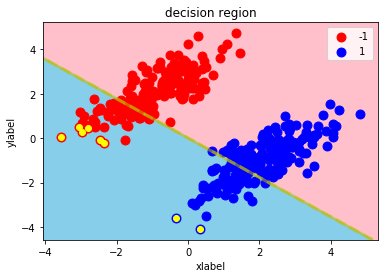

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

X=train_x
y=train_y
#model
step=0.01
title='decision region'
xlabel='xlabel'
ylabel='ylabel'
target_names=['-1', '1']

"""
2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
背景の色が学習したモデルによる推定値から描画される。
散布図の点は訓練データまたは検証データである。
Parameters
----------------
X : ndarray, shape(n_samples, 2)
    特徴量
y : ndarray, shape(n_samples,)
    ラベル
model : object
    学習したモデルのインスンタスを入れる
step : float, (default : 0.1)
    推定値を計算する間隔を設定する
title : str
    グラフのタイトルの文章を与える
xlabel, ylabel : str
    軸ラベルの文章を与える
target_names= : list of str
    凡例の一覧を与える
"""
# setting
scatter_color = ['red', 'blue']
contourf_color = ['pink', 'skyblue']
n_class = 2
# pred
mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]

chida=S_SVM.SVM_sample_predict(train_x,train_y,mesh,a)
chida1=np.array(chida)
y_pred = chida1.reshape(mesh_f0.shape)
# plot
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

y=y.reshape(375,)

for i, target in enumerate(set(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
plt.legend(handles=patches)
plt.legend()
plt.scatter(ya1,ya2,color="yellow")
plt.show()

今回は、イテレーションの回数が少なかったのも関係するのか、適切なサポートベクターは選べなかった。

今後、学習を重ねて確実なサポートベクトルを選べるモデルを作成したい。